PHASE 1 PROJECT IPYNB

## Final Project Submission

Please fill out:
* Student name:WILLIAM ONSARE MORARA
* Student pace: full time
* Scheduled project review date/time: 12- MARCH -2023
* Instructor name: WILLIAM OKOMBA
* Blog post URL: 


# BUSINESS PROBLEM

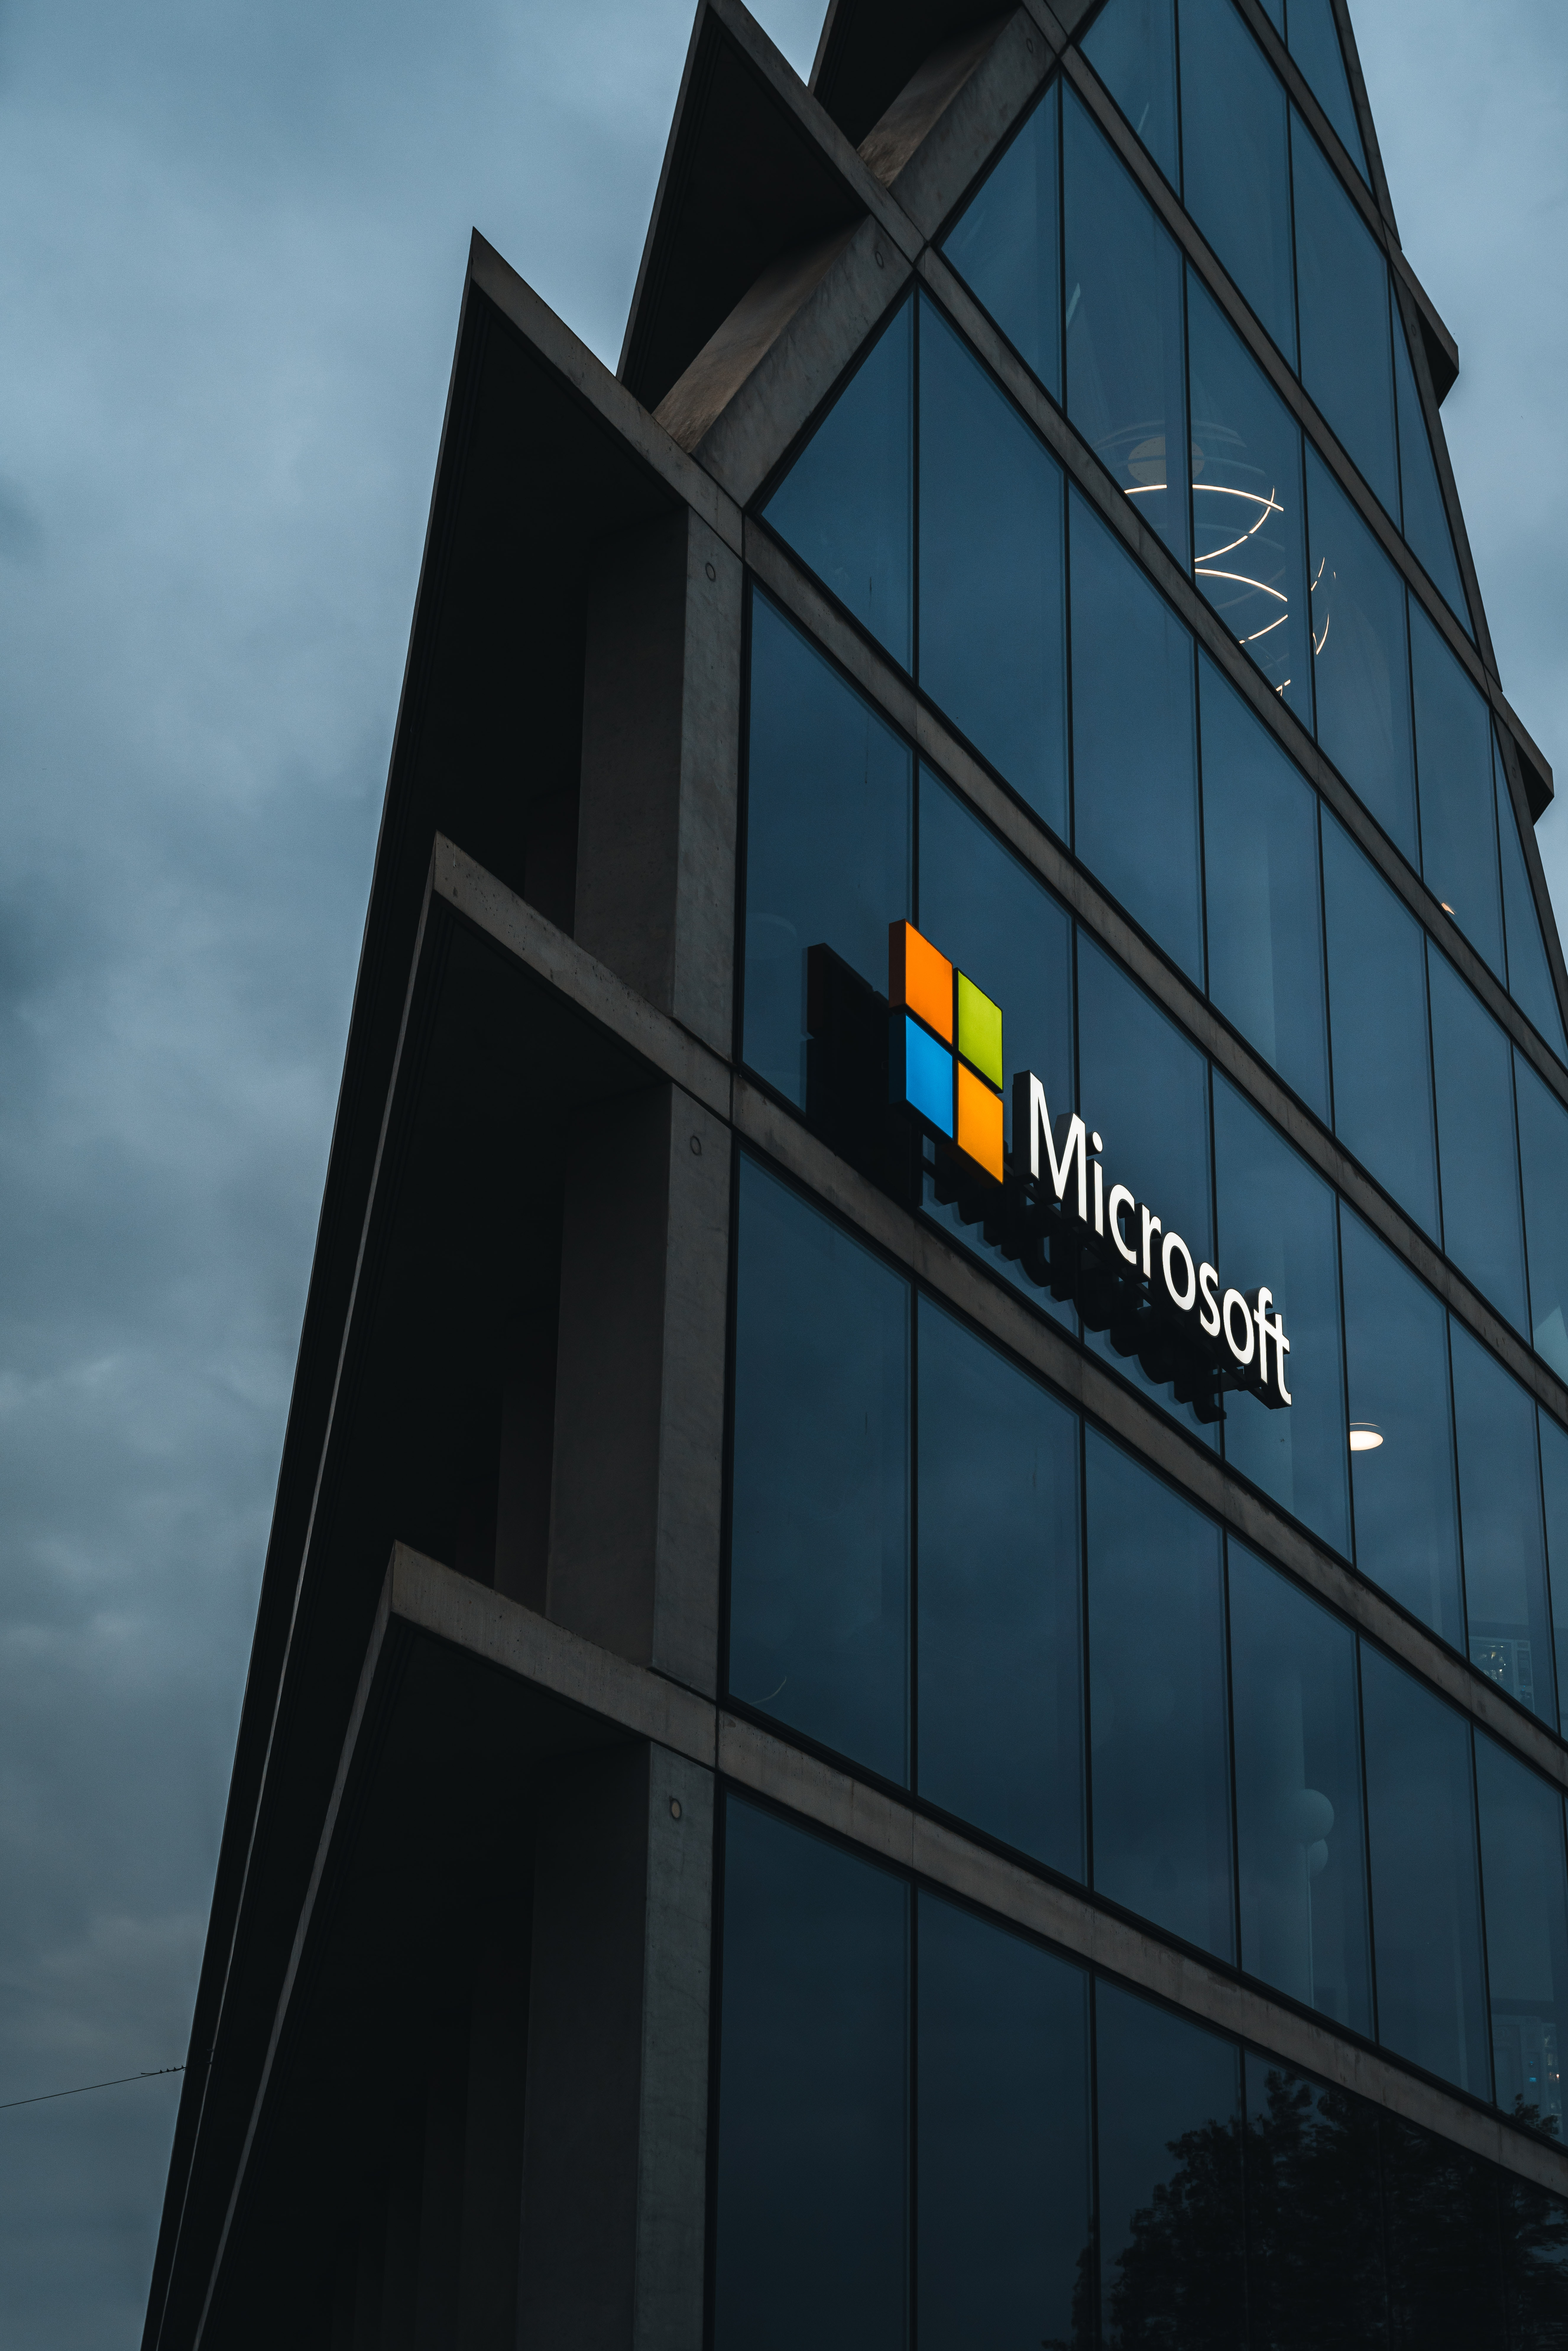

# BUSINESS PROBLEM

Microsoft have decided to enter the business of creating original movies, and the task at hand is to help them with important insights  and market information to  be able to come up with a movie studio that will be profitable and good to their business 

# OVERVIEW 
. Microsoft have decided to create a new movie studio, but they don’t know anything about creating movies. 
After exploring what types of films are currently doing the best at the box office. 
Using data from various websites like box office mojo and The numbers.
We recommend Microsoft put a lot of investment into producing movies whose genres are action, adventure, comedy, drama, animation and sci-fi and majorly use English as their original language






# WE START BY IMPORTING LIBRARIES THAT WE WILL USE FOR DATA MANIPULATION AND ANALYSIS

## Importing libararies

In [1]:
import pandas as pd 
#for data reading and analysis
import numpy as np 
#for numerical evaluations
import seaborn as sns
#for data visualization and aesthetics
import matplotlib.pyplot as plt
#for data ploting and visualization 
%matplotlib inline

# Box office mojo data

Our first data for consideration will be "bom.movie_gross.csv" which is data from box office mojo by IMDBpro which is the essential resource for the entertainment industry that helps uncover box office trends and insights and track industry trends

# Loading box office mojo data

In [2]:
#for easy memorability we will refer to the data as bom_data
bom_data = pd.read_csv("bom.movie_gross.csv")


# DATA INSIGHTS

In [3]:
#we will start by having a look at what type of data we have
bom_data.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [4]:
#let us know the type of data and how to treat the data
type(bom_data)

pandas.core.frame.DataFrame

In [5]:
#let us confirm the number of rows and columns
bom_data.shape

(3387, 5)

In [6]:
#let us have alook at the full data
bom_data

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

In [7]:
#now let us see what our data is about and how many values it has
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
#lets us see some numerical information
bom_data.describe()

domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000

# now let us check the data quality.
we have seen from above that some columns have missing values we can get the total number

In [9]:
#using a boolean test to know number of missing values in each columns
bom_data.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

we can see the number is large but it would be better to see the percentage

In [10]:
#we can get the percentage of missing values so we could see the effect they have
percentage = np.round((bom_data.isnull().sum()/len(bom_data)),4).sort_values()
percentage

title             0.0000
year              0.0000
studio            0.0015
domestic_gross    0.0083
foreign_gross     0.3986
dtype: float64

39 % is a large percentage and it would affect our data immensely so dropping the column would be a good idea.

In [11]:
#let us check for duplicates
bom_data.duplicated().value_counts()

False    3387
dtype: int64

There are no duplicates in our dataset

# DATA CLEANING

From our data quality we can notice that we had a high percentage of our missing values in foreign gross column so it would be a better idea to drop the foreign gross column using the dropna function and fill the other two because using fillna function because gomestic_gross is numerical we will fill it with the mean and because studio is categorical we will fill it with the mode. 

In [12]:
#dropping foreign_gross column
bom_data.drop("foreign_gross",axis = 1, inplace=True )

In [13]:
bom_data.isnull().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [14]:
#filling domestic_gross with with the mean
bom_data['domestic_gross'].fillna(bom_data['domestic_gross'].mean(), inplace = True)

In [15]:
bom_data['studio'].fillna(bom_data['studio'].mode()[0], inplace = True)

In [16]:
bom_data.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

our data has no missing values now so it is ready to go for data analysis

# DATA  ANALYSIS

In our data analysis we will check for various instances including groupby and correlation to check for any various patterns or trends in our data

In [17]:
#we will check on the studios that are best considering the domestic gross
best_studios = bom_data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
best_studios.head()


studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.488429e+09
Name: domestic_gross, dtype: float64

this are the top 5 studio that made the most amount of money 

In [18]:
#we will check domestic_gross made each year to see if the movie industry is profitable
yearly_income = bom_data.groupby('year')['domestic_gross'].sum()
yearly_income

year
2010    1.030066e+10
2011    1.012165e+10
2012    1.107783e+10
2013    1.093606e+10
2014    1.045272e+10
2015    1.108015e+10
2016    1.133989e+10
2017    1.096201e+10
2018    1.109121e+10
Name: domestic_gross, dtype: float64

In [19]:
#we create a new column to check if there is a relationship between domestic gross and the lenght of the title
bom_data['title_length'] = bom_data['title'].str.len()

In [20]:
bom_data['title_length'].corr(bom_data['domestic_gross'])

0.06806812153589166

There seems to be no relationship between title lenght and domestic gross

# Data visualization

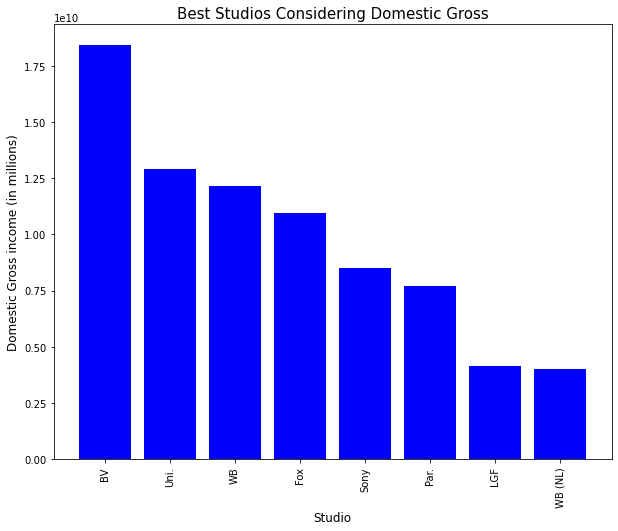

In [21]:
#ploting a graph of the best selling studios that made the most in the industry
fig = plt.figure(figsize=(10, 8))
plt.bar(best_studios[0:8].index, best_studios[0:8].values, color = "blue")
plt.xticks(rotation=90) #To avoid congestion
plt.xlabel('Studio', fontsize = 12)
plt.ylabel('Domestic Gross income (in millions)', fontsize = 12)
plt.title('Best Studios Considering Domestic Gross', fontsize = 15)
plt.show()


it is possible to pull resources to make movies once in a while and microsoft should consider working with this studios because they made the best domestic gross

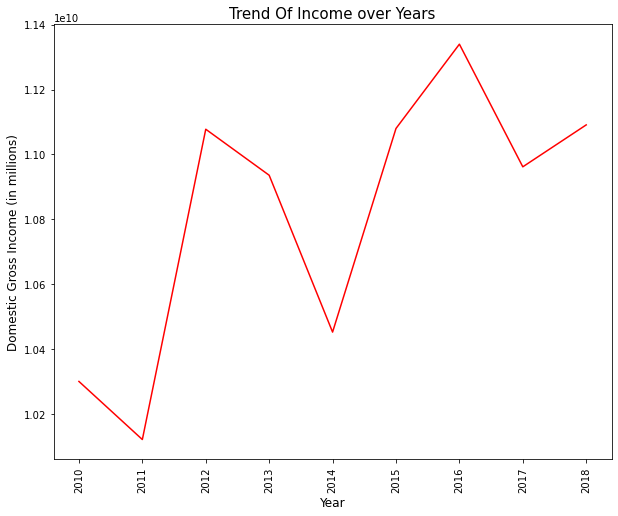

In [22]:
fig = plt.figure(figsize=(10, 8))
plt.plot(yearly_income.index, yearly_income.values, color = "red")
plt.xticks(rotation=90) 
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Domestic Gross Income (in millions)', fontsize = 12)
plt.title('Trend Of Income over Years', fontsize = 15)
plt.show()

Generally from this line graph we can see that over the years the domestic gross  has been increasing so this would be anice investment for our stake holders because  over the years the domestic gross will increase  which is agood investment because they will make profits.

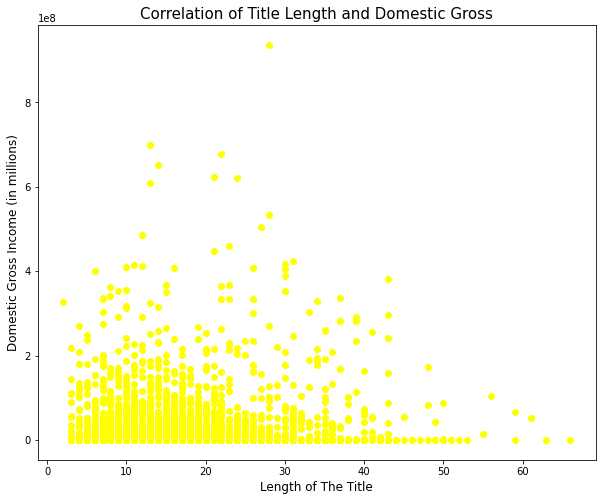

In [23]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(bom_data['title_length'], bom_data['domestic_gross'], color = "yellow")
plt.xlabel('Length of The Title', fontsize = 12)
plt.ylabel('Domestic Gross Income (in millions)', fontsize = 12)
plt.title('Correlation of Title Length and Domestic Gross', fontsize = 15)
plt.show()


There is no specific pattern that the length  of title has so microsoft can make their movie titles as creative as they wish

# im.db

The second data in our analysis will be "im.db" which is a database form IMDb which is a website for entertainment fans that has information about movies in details 

## im.db is a database so we have to use sqlite

# Importing sqlite libraries and connecting to our database

In [24]:
import sqlite3
#for database reading and comprehension
import pandas as pd
#for database analysis 
conn = sqlite3.connect("im.db") #connecting to the database

# Data insights

In [25]:
#let us see what the data looks like
movie_basics = pd.read_sql("""SELECT *
FROM movie_basics"""
            ,conn)
movie_basics.head()

movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [26]:
#let us see generally how many rows and columns the database has
movie_basics.shape

(146144, 6)

In [27]:
#checking for deatails about the data
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [28]:
#now to our second database
movie_ratings = pd.read_sql("""SELECT *
FROM movie_ratings"""
            ,conn)
movie_ratings.head()


movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

In [29]:
#checking for number of rows and columns
movie_ratings.shape

(73856, 3)

In [30]:
#checking for details about the data
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Between movie basics and movie ratings we can see a common column which is movie_id that can be used to join the two data for analysis

# JOIN  the  two table considering the common factor "movie_id"

In [31]:
#the coomon column between the two data bases is movie id so we will use it to join both sql databases
joined_sql_table = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
""", conn)

In [32]:
#let us see how our joined table looks
joined_sql_table.head()

movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119

In [33]:
#checking for the type of data
type(joined_sql_table)

pandas.core.frame.DataFrame

In [34]:
#checking for the number of rows and columns after joing
joined_sql_table.shape

(73856, 8)

In [35]:
#checking some information about our data
joined_sql_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [36]:
#some statistics
joined_sql_table.describe()

start_year  runtime_minutes  averagerating      numvotes
count  73856.000000     66236.000000   73856.000000  7.385600e+04
mean    2014.276132        94.654040       6.332729  3.523662e+03
std        2.614807       208.574111       1.474978  3.029402e+04
min     2010.000000         3.000000       1.000000  5.000000e+00
25%     2012.000000        81.000000       5.500000  1.400000e+01
50%     2014.000000        91.000000       6.500000  4.900000e+01
75%     2016.000000       104.000000       7.400000  2.820000e+02
max     2019.000000     51420.000000      10.000000  1.841066e+06

# Quality of the data

now that we have seen our data let us check for its quality to see and have an idea of what we need to clean

In [37]:
#checcking for null values
joined_sql_table.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The number is large but we can check for its percentage to see how it affects our dataset

In [38]:
np.round((joined_sql_table.isnull().sum()/len(joined_sql_table)),4).sort_values()


movie_id           0.0000
primary_title      0.0000
original_title     0.0000
start_year         0.0000
averagerating      0.0000
numvotes           0.0000
genres             0.0109
runtime_minutes    0.1032
dtype: float64

The percentage seems to be small it has no adverse effect on our data

In [39]:
#checking for duplicates
joined_sql_table.duplicated().sum()

0

There are no duplicates in our data

# Data cleaning

We now move to cleaning our data because we saw there were some inconsistences in our data.
because the percentage was small we choose to fill the missing values using the fillna function.
Because genres is categorical we will fill it with the mode 
Because runtime minutes is numerical we will fill it with the mean

In [40]:

joined_sql_table['genres'].fillna(joined_sql_table['genres'].mode()[0], inplace = True)

In [41]:
joined_sql_table['runtime_minutes'].fillna(joined_sql_table['runtime_minutes'].mean(), inplace = True)

In [42]:
joined_sql_table.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Our data has no null values so we can start analysing it

# Data analysis

we check for relationship, trends and grouping of our data.

In [43]:
#checking for relationship using correlation
joined_sql_table['runtime_minutes'].corr(joined_sql_table['averagerating'])


-0.006520533845681608

In [44]:
joined_sql_table['runtime_minutes'].corr(joined_sql_table['numvotes'])

0.012462673507422846

There is no strong correlation between running time and  number of votes or running time and average rating hence microsoft studios are not limited in making of movies in terms of running time 

In [45]:
joined_sql_table.groupby('start_year')['averagerating'].mean()

start_year
2010    6.259585
2011    6.290134
2012    6.297057
2013    6.287259
2014    6.319806
2015    6.265894
2016    6.347300
2017    6.397624
2018    6.415599
2019    6.703578
Name: averagerating, dtype: float64

In [46]:
#Getting top 10 genres that had the most votes
joined_sql_table.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(10)



genres
Action,Adventure,Sci-Fi       23023248
Action,Adventure,Fantasy       9658883
Adventure,Animation,Comedy     8687435
Drama                          8415279
Comedy,Drama,Romance           7665463
Action,Adventure,Comedy        7256686
Comedy                         6832037
Comedy,Drama                   6462839
Action,Crime,Drama             5563553
Drama,Romance                  5542760
Name: numvotes, dtype: int64

Microsoft should consider making 

Action,Adventure,Sci-Fi
Action,Adventure,Fantasy
Adventure,Animation,Comedy
Drama    
Comedy,Drama,Romance
Action,Adventure,Comedy  movies
because they had over 7 million votes which means most people would prefer them

# Data visualization

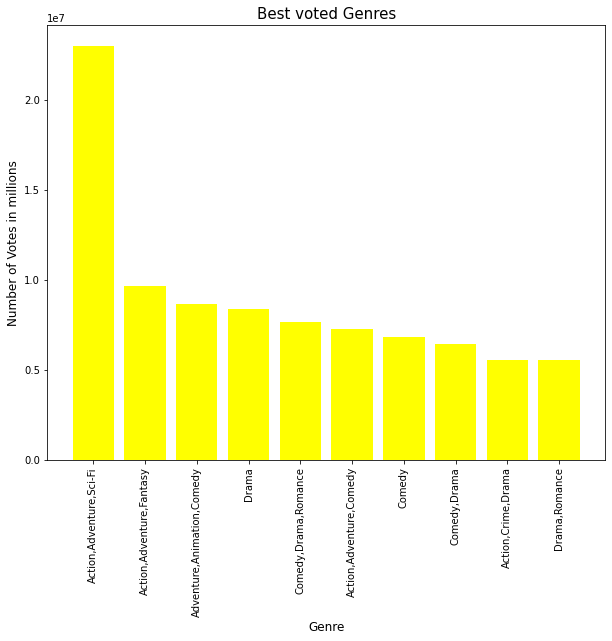

In [47]:

fig = plt.figure(figsize=(10, 8))
number_of_genre_votes = joined_sql_table.groupby('genres')['numvotes'].sum().sort_values(ascending=False)[:10]
plt.bar(number_of_genre_votes.index,number_of_genre_votes.values, color = "yellow")
plt.title('Best voted Genres', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Genre',  fontsize = 12)
plt.ylabel('Number of Votes in millions',  fontsize = 12)
plt.show()


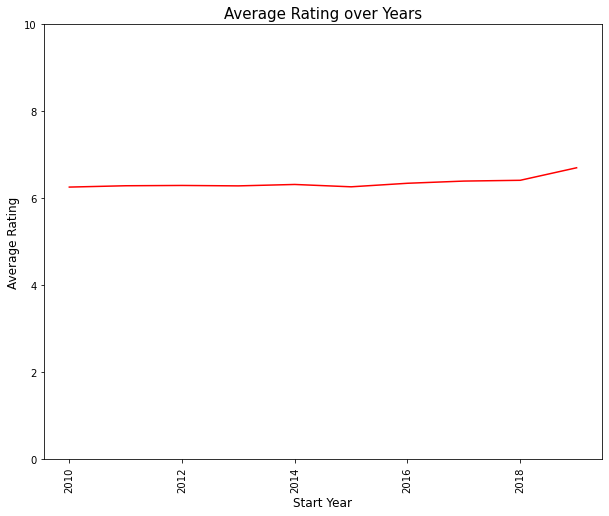

In [48]:
fig = plt.figure(figsize=(10, 8))
yearly_rates = joined_sql_table.groupby('start_year')['averagerating'].mean()
plt.plot(yearly_rates.index, yearly_rates.values, color = "red")
plt.title('Average Rating over Years', fontsize=15)
plt.xlabel('Start Year', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 10)  # set the y-axis limits from 0 to 10
plt.show()


On average rating movies seems to be increasing over the years which points to the fact that movies are becoming more popular which shows shows that it is a good investment 

# BUDGETS DATA

Next we will use "tn.movie_budgets.csv" which is data from "The numbers" a website that shows how much movies in the box office are making this will help us know whether movie studio will be profitable or which movies are making the most.

## loading  "tn.movie_budgets.csv" data 

In [49]:
budgets_data = pd.read_csv("tn.movie_budgets.csv")

# Data insights

In [50]:
#data preview
budgets_data.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [51]:
type(budgets_data)

pandas.core.frame.DataFrame

In [52]:
budgets_data.shape

(5782, 6)

In [53]:
budgets_data

id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 6 columns]

In [54]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [55]:
budgets_data.describe()

id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000

notice that we did not get the describtion for some columns because of their data type

#  Quality of data 

In [56]:
#checking for null values
budgets_data.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [57]:
#checking for duplicates
budgets_data.duplicated().value_counts()

False    5782
dtype: int64

our data does not have null values or duplicated values but some columns were wrongly classified in terms of data types and that will be our focus in data cleaning.

# Data cleaning

In [58]:
#converting domestic gross production budget and worldwide gross into float type
budgets_data[["domestic_gross", "production_budget", "worldwide_gross"]] = budgets_data[["domestic_gross", "production_budget", "worldwide_gross"]].apply(lambda x: x.str.replace('$', '').str.replace(',', '').astype(float))


In [59]:
#converting release date into datetime type
budgets_data['release_date'] = pd.to_datetime(budgets_data ['release_date'])


In [60]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


our data is now in the right data types

In [61]:
budgets_data.describe()

id  production_budget  domestic_gross  worldwide_gross
count  5782.000000       5.782000e+03    5.782000e+03     5.782000e+03
mean     50.372363       3.158776e+07    4.187333e+07     9.148746e+07
std      28.821076       4.181208e+07    6.824060e+07     1.747200e+08
min       1.000000       1.100000e+03    0.000000e+00     0.000000e+00
25%      25.000000       5.000000e+06    1.429534e+06     4.125415e+06
50%      50.000000       1.700000e+07    1.722594e+07     2.798445e+07
75%      75.000000       4.000000e+07    5.234866e+07     9.764584e+07
max     100.000000       4.250000e+08    9.366622e+08     2.776345e+09

# Data analysis

checking for more about the data to get any trends or sequences the data is following

In [62]:
budgets_data["production_budget"].mean()

31587757.0965064

In [63]:
budgets_data['domestic_gross'].mean()

41873326.867001034

In [64]:
budgets_data['worldwide_gross'].mean()

91487460.90643376

In [65]:
#creating a new column of profit
budgets_data['profit'] = ((budgets_data['worldwide_gross'] - budgets_data['production_budget'])).round(4)
budgets_data.head()

id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross        profit  
0        425000000.0     760507625.0     2.776345e+09  2.351345e+09  
1        410600000.0     241063875.0     1.045664e+09  6.350639e+08  
2        350000000.0      42762350.0     1.497624e+08 -2.002376e+08  
3        330600000.0     459005868.0     1.403014e+09  1.072414e+09  
4        317000000.0     620181382.0     1.316722e+09  9.997217e+08

In [66]:
#creating a new column investment return 
budgets_data['investment_return'] = (budgets_data['profit'] /budgets_data['production_budget']) * 100
budgets_data.head()


id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross        profit  \
0        425000000.0     760507625.0     2.776345e+09  2.351345e+09   
1        410600000.0     241063875.0     1.045664e+09  6.350639e+08   
2        350000000.0      42762350.0     1.497624e+08 -2.002376e+08   
3        330600000.0     459005868.0     1.403014e+09  1.072414e+09   
4        317000000.0     620181382.0     1.316722e+09  9.997217e+08   

   investment_return  
0         553.257713  
1         154.667286  
2         -57.210757  
3         324.384139  
4         315.369636

### checking for correlation

In [67]:
budgets_data["production_budget"].corr(budgets_data['domestic_gross'])

0.6856818396752741

In [68]:
budgets_data["production_budget"].corr(budgets_data['worldwide_gross'])

0.7483059765694756

In [69]:
budgets_data["production_budget"].corr(budgets_data['profit'])

0.608752147171885

There is apostive correlation between production budget and world wide gross meaning the more microsoft will invest the more profit they stand to make.

# Data visualization

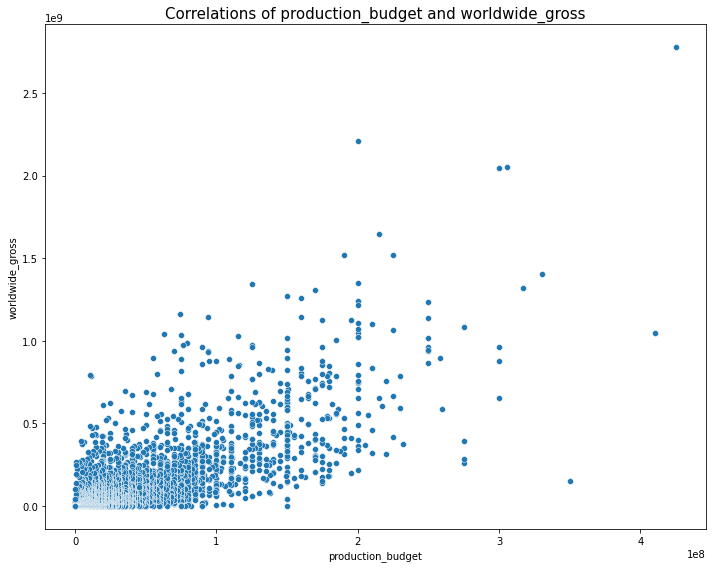

In [70]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = budgets_data,)
plt.title("Correlations of production_budget and worldwide_gross", fontsize=15)
plt.tight_layout()
plt.show()

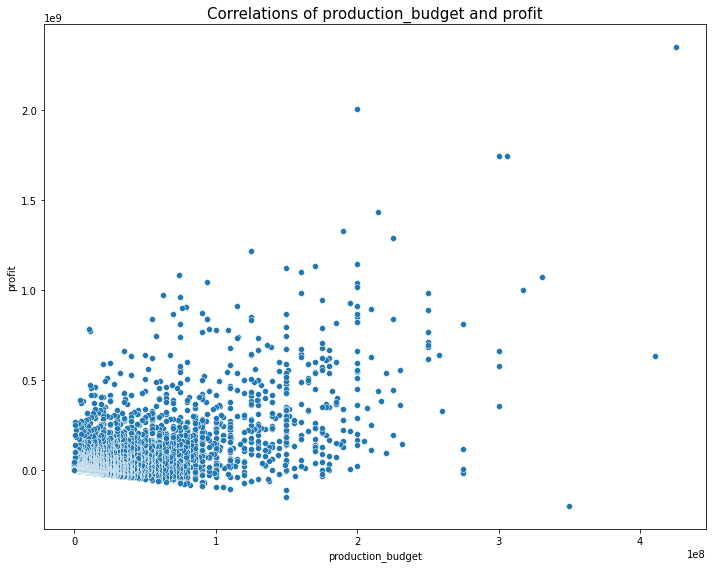

In [71]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='production_budget', y='profit', data = budgets_data,)
plt.title("Correlations of production_budget and profit", fontsize=15)
plt.tight_layout()
plt.show()

The trend shows that an increase in production budget also increases profit and worldwide gross income so to make more money mocrosoft will have to put more money in to production

# TMDB

Our next data set will be 'tmdb.movies.csv' which is a dataset from The Movie Database (TMDB) which is a community built movie and TV database. containing data dating back to 2008. TMDB's strong international focus and breadth of data is large that is why analysing it will help microsoft studios come up with a studio that will meet market needs

## loading data

In [72]:
tmdb_data = pd.read_csv('tmdb.movies.csv',index_col = 0)

# Data insights

In [73]:
#checking data
tmdb_data.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [74]:
type(tmdb_data)

pandas.core.frame.DataFrame

In [75]:
tmdb_data.shape

(26517, 9)

In [76]:
tmdb_data

genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 9 columns]

In [77]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [78]:
tmdb_data.describe()

id    popularity  vote_average    vote_count
count   26517.000000  26517.000000  26517.000000  26517.000000
mean   295050.153260      3.130912      5.991281    194.224837
std    153661.615648      4.355229      1.852946    960.961095
min        27.000000      0.600000      0.000000      1.000000
25%    157851.000000      0.600000      5.000000      2.000000
50%    309581.000000      1.374000      6.000000      5.000000
75%    419542.000000      3.694000      7.000000     28.000000
max    608444.000000     80.773000     10.000000  22186.000000

# Data quality

In [79]:
tmdb_data.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

There are no null values in our data 

In [80]:
tmdb_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

Our data has 1020 duplicates this can affect data analysis

# Data cleaning

we will drop duplicates because they were the only inconsistense in our data

In [81]:
#drpping duplictes while keeping the first one to appear
tmdb_data.drop_duplicates(keep = 'first',inplace = True)

In [82]:
tmdb_data.duplicated().value_counts()

False    25497
dtype: int64

our data no longer has duplicates so it is ready for analysis

# Data analysis

In [83]:
tmdb_data['vote_average'].corr(tmdb_data['popularity'])

0.057177980058868316

There is no correlation between vote avaerage and popularity

### in this data language codes  are used as specified by the ISO 639-1 standard.

In [84]:
 tmdb_data.groupby('original_language')['vote_count'].sum().sort_values(ascending=False).head(10)

original_language
en    4314730
fr      69634
ja      40360
es      26469
it      14846
de      12356
ko      10931
sv       9171
hi       7833
da       7719
Name: vote_count, dtype: int64

we can see that movies whose original language is (en) english got most votes but also among  best selling languages are
(fr) French
(ja) Japanese
(es) Spanish
(it) Italian
(de) German
(ko) Korean which also had above 10000 votes

# Data visualization

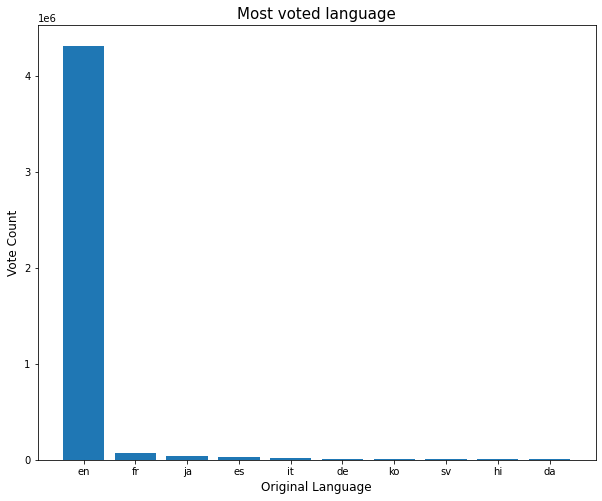

In [85]:
fig = plt.figure(figsize=(10, 8))
language_vote_count = tmdb_data.groupby('original_language')['vote_count'].sum()
top_languages = language_vote_count.sort_values(ascending=False)[:10]
plt.bar(top_languages.index, top_languages.values)
plt.title('Most voted language', fontsize = 15)
plt.xlabel('Original Language', fontsize = 12)
plt.ylabel('Vote Count', fontsize = 12)
plt.show()


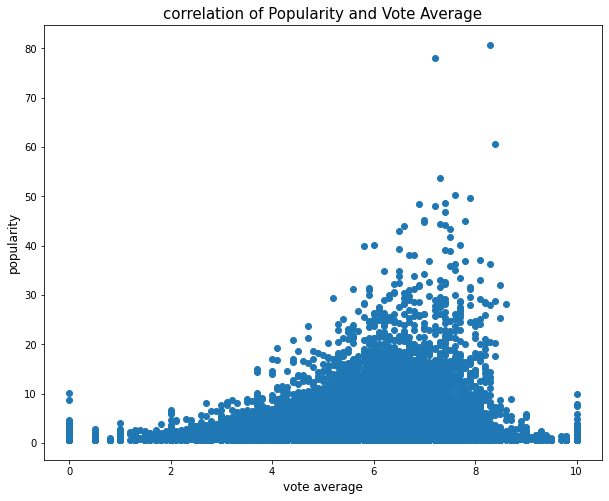

In [86]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(tmdb_data['vote_average'], tmdb_data['popularity'])
plt.title('correlation of Popularity and Vote Average', fontsize = 15)
plt.xlabel('vote average', fontsize = 12)
plt.ylabel('popularity', fontsize = 12)
plt.show()


There is no particular pattern between vote average and popularity

# Conclusion

1. Over the years the domestic gross generated from movies has been increasing thus investing in a movie studio would be a good move for our stake holders.

2. Microsoft may choose to partner with BV,Uni.,WB, Fox and Sony   studios because they made the best domestic gross so money invested in a movie together with these companies is likely to generate more profits.

3. There is no relationship between the length of title of a movie and its income return therefore microsoft can make their movie titles as creative as they wish.

4. Microsoft should consider making Action,Adventure,Sci-Fi Action,Adventure,Fantasy Adventure,Animation,Comedy Drama Comedy,Drama,Romance Action,Adventure,Comedy movies because they had over 7 million votes which means most people would prefer them

5. An increase in production budget also increases profit and worldwide gross income so to make more money mocrosoft will have to put more money in to production

6. Movies whose original language is (en) english got most votes but also among best selling languages are (fr) French (ja) Japanese (es) Spanish (it) Italian (de) German (ko) Korean which also had above 10000 votes

7. There is no relationship between vote average and popularity

# RECOMENDATIONS

From the above analysis and visualization my recomendations are

From the analysis  i would recommend microsoft to largely focus on producing; action, adventure, comedy, drama, animation and sc-fi as their main genres of movies because they got the most votes meaning people preffered them.

I would recommend microsoft to focus on majorly producing most of their movies with english as their original language because most people voted for movies whose original language is english.

I would recomend microsoft to invest more into movie production budget, Microsoft may choose to partner with BV,Uni.,WB, Fox and Sony studios because it will in return give higher profits because they are the best selling movie studios.